In [1]:
#모듈 설정
import pandas as pd #엑셀 대용량 데이터 처리
import matplotlib.pyplot as plt #단순 시각화
import seaborn as sns #고급통계 시각화
import statsmodels.api as sm#통계계산모듈
from scipy import stats#과학계산 모듈
import numpy as np#과학계산 행렬모듈

In [2]:
#한글 폰트 깨지지 않도록 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
#-값 폰트 깨지지 않도록 설정
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

In [4]:
#덴버 데이터 호출 parse_date는 시간 추출을 위해 True로 반환
denver_data = pd.read_csv("./data/crime.csv", parse_dates = True)
denver_data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [5]:
denver_data.REPORTED_DATE = pd.to_datetime(denver_data.REPORTED_DATE)#datetime으로 데이터타입 변경
denver_data["YEAR"]= denver_data.REPORTED_DATE.dt.year#year값만 추출
denver_data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,2016-06-15 23:31:00,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0,2016
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,2018-01-29 17:53:00,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0,2018
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,2016-04-26 21:02:00,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0,2016
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,2018-01-30 22:29:00,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0,2018
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,2017-06-23 16:09:00,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0,2017


In [6]:
denver_crime=denver_data[denver_data['IS_CRIME']==1]#범죄인지 아닌지 여부 판단
denver_crime=denver_crime[denver_crime['YEAR']< 2019]#2019년도 이전값만 보여주기 because 2019년 데이터는 양이 많지 않아 삭제
denver_crime['HOUR_REPORTED']=pd.DatetimeIndex(denver_crime['REPORTED_DATE']).hour#hour값 추출
denver_crime['WEEKDAY_REPORTED']=pd.DatetimeIndex(denver_crime['REPORTED_DATE']).weekday#weekday 값 추출
denver_crime['MONTH_REPORTED']=pd.DatetimeIndex(denver_crime['REPORTED_DATE']).month#month값 추출
denver_crime['YEAR_REPORTED']=pd.DatetimeIndex(denver_crime['REPORTED_DATE']).year#year값 추출
denver_crime.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,HOUR_REPORTED,WEEKDAY_REPORTED,MONTH_REPORTED,YEAR_REPORTED
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,2016-06-15 23:31:00,NaN,...,5,521,montbello,1,0,2016,23,2,6,2016
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,2018-01-29 17:53:00,NaN,...,5,522,gateway-green-valley-ranch,1,0,2018,17,0,1,2018
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,2016-04-26 21:02:00,2932 S JOSEPHINE ST,...,3,314,wellshire,1,0,2016,21,1,4,2016
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,2018-01-30 22:29:00,705 S COLORADO BLVD,...,3,312,belcaro,1,0,2018,22,1,1,2018
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,2017-06-23 16:09:00,2810 E 1ST AVE,...,3,311,cherry-creek,1,0,2017,16,4,6,2017


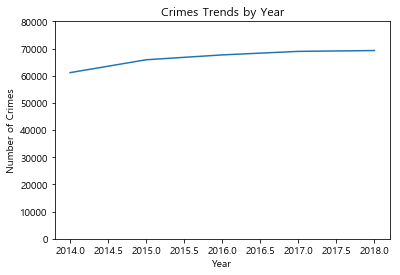

In [7]:
denver_crime.groupby(denver_crime.YEAR_REPORTED)['YEAR_REPORTED'].agg('count').plot('line')#year을 바탕으로 범죄데이터 추출
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crimes Trends by Year')
plt.ylim(0 ,80000)
plt.show()

In [8]:
#덴버의 범죄유형을 뽑아봤다
denver_crime["OFFENSE_CATEGORY_ID"].unique()

array(['all-other-crimes', 'larceny', 'theft-from-motor-vehicle',
       'drug-alcohol', 'auto-theft', 'white-collar-crime', 'burglary',
       'public-disorder', 'aggravated-assault',
       'other-crimes-against-persons', 'robbery', 'sexual-assault',
       'murder', 'arson'], dtype=object)

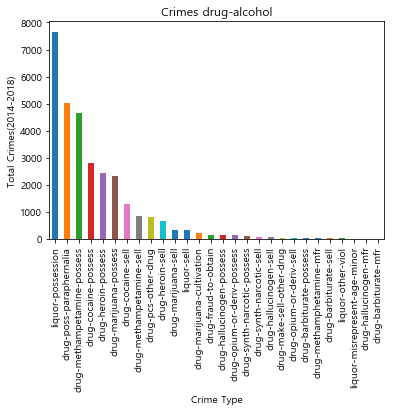

In [9]:
#덴버의 약물범죄중 무슨 범죄가 많이 일어나는지 시각화
denver_crime[denver_crime["OFFENSE_CATEGORY_ID"] == "drug-alcohol"].OFFENSE_TYPE_ID.value_counts().plot.bar()
plt.title("Crimes drug-alcohol")
plt.xlabel("Crime Type")
plt.ylabel("Total Crimes(2014-2018)")
plt.show()

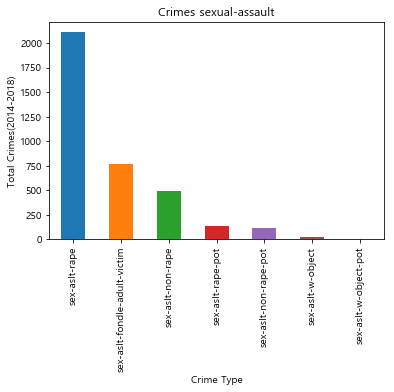

In [10]:
#덴버의 성범죄중 무슨 범죄가 많이 일어났는지 시각화
denver_crime[denver_crime["OFFENSE_CATEGORY_ID"] == "sexual-assault"].OFFENSE_TYPE_ID.value_counts().plot.bar()
plt.title("Crimes sexual-assault")
plt.xlabel("Crime Type")
plt.ylabel("Total Crimes(2014-2018)")
plt.show()

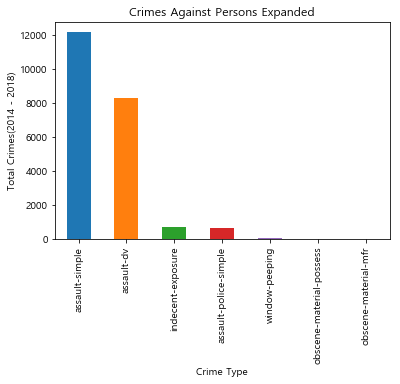

In [11]:
#다른사람들과 충돌이 있었던 범죄의 경우 뭐가 제일 많은 범죄를 저질렀는지 확인
denver_crime[denver_crime["OFFENSE_CATEGORY_ID"] == "other-crimes-against-persons"].OFFENSE_TYPE_ID.value_counts().plot.bar()
plt.title("Crimes Against Persons Expanded")
plt.xlabel("Crime Type")
plt.ylabel("Total Crimes(2014 - 2018)")
plt.show()

In [12]:
#연도 값과 범죄 유형을 그룹화 시켜주어서 데이터테이블로 만들어줌 연도별로 무슨 범죄가 일어났는지 count해줌
grouped = denver_crime.groupby(["YEAR_REPORTED", "OFFENSE_CATEGORY_ID"])["OFFENSE_CATEGORY_ID"].agg("count")
grouped = grouped.unstack()
grouped

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime
YEAR_REPORTED,,,,,,,,,,,,,,
2014,1739,15205,128,3394,4410,5967,9030,32,4034,9766,1056,519,4939,911
2015,2006,15728,107,4479,4862,6186,8830,57,4409,9776,1213,685,6255,1277
2016,2143,16462,95,4818,4689,6082,9139,54,4638,9917,1154,710,6549,1210
2017,2099,17232,125,5560,4450,5672,8967,58,4756,9348,1206,855,7328,1297
2018,2442,17630,115,5332,4098,6136,9244,57,4094,8602,1202,887,8127,1299


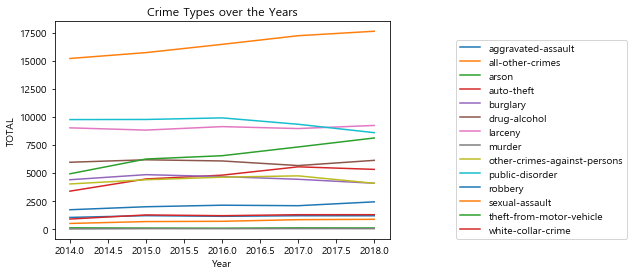

In [13]:
#위의 그룹화된 데이터를 시각화 시켰다.
grouped.plot()
plt.legend(loc = (1.2, 0))
plt.xlabel("Year")
plt.ylabel("TOTAL")
plt.title("Crime Types over the Years")
plt.show()

In [14]:
#월별로 무슨 범죄가 많이 일어났는지 그룹화 시킴
temp = denver_crime.groupby([denver_crime.MONTH_REPORTED, denver_crime.OFFENSE_CATEGORY_ID])["OFFENSE_CATEGORY_ID"].agg("count")
temp = temp.unstack(level = 1)
temp

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime
MONTH_REPORTED,,,,,,,,,,,,,,
1,724,7139,41,1911,1829,2288,3394,21,1581,3653,516,257,2630,429
2,663,6361,53,1620,1641,2227,2986,15,1454,3438,340,235,2118,494
3,843,7336,56,1704,1732,2678,3380,21,1768,3817,432,327,2563,588
4,798,7127,44,1733,1781,2864,3579,25,1795,4205,431,289,2680,645
5,905,7382,43,1963,1947,2651,3913,14,2012,4395,480,317,2812,514
6,966,6587,47,1944,1971,2455,4071,12,1988,4291,488,327,2986,492
7,1064,6928,61,2127,1961,2460,4278,37,2076,4339,576,326,3050,462
8,921,7197,53,2274,2144,2939,4426,28,1976,4400,551,288,3251,515
9,976,6897,43,2164,1983,2767,4051,20,1997,4075,525,339,2970,486


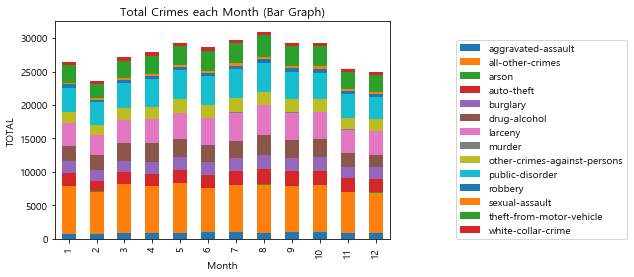

In [15]:
#위의 데이터 그룹을 barchart로 시각화했다 각 범죄도 얼마나 많은지 시각화 시켰다.
ax = temp.plot.bar(stacked = True)
plt.legend(loc = (1.2, 0))
plt.title('Total Crimes each Month (Bar Graph)')
plt.xlabel("Month")
plt.ylabel('TOTAL')
plt.show()

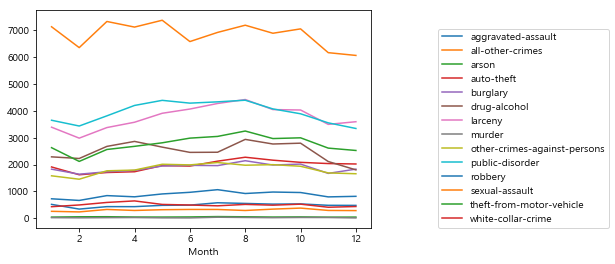

In [16]:
#그룹화된 데이터중 어떤 범죄가 많이 일어났는지 chart화 시켜서 보여줌
temp.plot()
plt.xlabel("Month")
plt.legend(loc = [1.2, 0])
plt.show()

In [17]:
#여름철 범죄율을 따로 뽑았다.
summer = denver_crime[(denver_crime["MONTH_REPORTED"] == 6) | (denver_crime["MONTH_REPORTED"] == 7) | (denver_crime["MONTH_REPORTED"] == 8)]
summer.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,HOUR_REPORTED,WEEKDAY_REPORTED,MONTH_REPORTED,YEAR_REPORTED
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,2016-06-15 23:31:00,NaN,...,5,521,montbello,1,0,2016,23,2,6,2016
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,2017-06-23 16:09:00,2810 E 1ST AVE,...,3,311,cherry-creek,1,0,2017,16,4,6,2017
13,2017383968,2017383968240400,2404,0,theft-of-motor-vehicle,auto-theft,2/24/2017 4:55:00 PM,5/24/2017 8:01:00 AM,2017-06-12 15:24:00,2850 W 26TH AVE,...,1,121,jefferson-park,1,0,2017,15,0,6,2017
16,2017395809,2017395809240400,2404,0,theft-of-motor-vehicle,auto-theft,6/16/2017 9:30:00 PM,6/17/2017 7:12:00 AM,2017-06-17 07:12:00,6825 E ILIFF AVE,...,3,323,goldsmith,1,0,2017,7,5,6,2017
29,2016398281,2016398281570700,5707,0,criminal-trespassing,all-other-crimes,6/12/2016 8:00:00 PM,6/14/2016 8:00:00 PM,2016-06-24 20:08:00,5046 N AKRON ST,...,5,511,stapleton,1,0,2016,20,4,6,2016


In [18]:
#겨울철 범죄 빈도를 따로 뽑았다.
winter = denver_crime[(denver_crime["MONTH_REPORTED"] == 12) | (denver_crime["MONTH_REPORTED"] == 1) | (denver_crime["MONTH_REPORTED"] == 2)]
winter.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,HOUR_REPORTED,WEEKDAY_REPORTED,MONTH_REPORTED,YEAR_REPORTED
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,2018-01-29 17:53:00,NaN,...,5,522,gateway-green-valley-ranch,1,0,2018,17,0,1,2018
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,2018-01-30 22:29:00,705 S COLORADO BLVD,...,3,312,belcaro,1,0,2018,22,1,1,2018
5,201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,2018-01-31 01:29:00,2100 BLOCK E 17TH AVE,...,6,622,city-park-west,1,0,2018,1,2,1,2018
6,20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2017 12:15:00 PM,1/26/2018 12:15:00 PM,2018-01-26 12:24:00,995 N FEDERAL BLVD,...,1,122,villa-park,1,0,2018,12,4,1,2018
7,201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,1/30/2018 7:40:00 AM,NaN,2018-01-30 10:33:00,E SPEER BLVD / N GRANT ST,...,3,311,speer,1,0,2018,10,1,1,2018


In [19]:
#여름 철에 무슨 범죄가 많이 일어났는지 년도와 날짜별로 그룹화 시킴
summer_grouped = summer.groupby(summer.REPORTED_DATE.dt.date)["REPORTED_DATE"].agg("count")
print(summer_grouped.mean())
summer_grouped.head()#여름철 범죄 빈도 평균

194.20217391304348


REPORTED_DATE
2014-06-01    162
2014-06-02    212
2014-06-03    178
2014-06-04    205
2014-06-05    149
Name: REPORTED_DATE, dtype: int64

In [20]:
#겨울 철에 무슨 범죄가 많이 일어났는지 년도와 날짜별로 그룹화 시킴
winter_grouped = winter.groupby(winter.REPORTED_DATE.dt.date)["REPORTED_DATE"].agg("count")
print(winter_grouped.mean())
winter_grouped.head()#겨울철 범죄빈도 평균 

166.61777777777777


REPORTED_DATE
2014-01-02     86
2014-01-03     99
2014-01-04     80
2014-01-05     74
2014-01-06    113
Name: REPORTED_DATE, dtype: int64

#따라서 우리는 여름철이 겨울철보다 범죄빈도수가 높다는 가설을 내세운후 가설 검정을 실시했다.

가설 검정

H_0 : 겨울철에 범죄 발생률이 더 높다.(mean1 - mean2 <= 0)

H_1 : 여름철에 범죄 발생률이 더 높다.(mean1 - mean2 > 0)

t-test 실시 0.05에서 유의수준 검정

C:\Users\leewo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


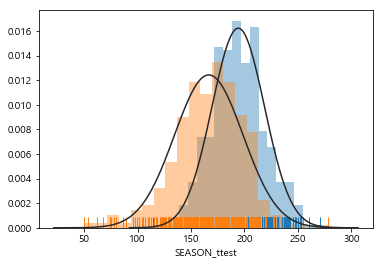

In [21]:
#seaborn을 이용해서 각 분포가 t분포인지 여부를 확인하기 위해 시각화 시캄
sns.distplot(summer_grouped, kde = False, rug=True, fit = stats.norm)
sns.distplot(winter_grouped, kde = False, rug=True, fit = stats.norm)
plt.xlabel("SEASON_ttest")
plt.show()

In [22]:
#stats모듈을 통해 t-test를 통해서 p-value를 구해봄
stats.ttest_ind(summer_grouped, winter_grouped, equal_var = False)#여름에 범죄 발생 비율이 더 높다

Ttest_indResult(statistic=14.5170094135986, pvalue=8.889307006813538e-43)

In [23]:
#주간 시간대 데이터 groupby시켜줌
weekday =  denver_crime.groupby(["WEEKDAY_REPORTED", "OFFENSE_CATEGORY_ID"])["OFFENSE_CATEGORY_ID"].count()
weekday = weekday.unstack()
weekday

OFFENSE_CATEGORY_ID,aggravated-assault,all-other-crimes,arson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime
WEEKDAY_REPORTED,,,,,,,,,,,,,,
0,1479,11393,94,3996,3968,4130,7186,38,2922,7427,884,574,6079,1038
1,1240,11706,89,3573,3654,4798,7026,22,2900,6663,818,521,5304,1138
2,1208,11590,82,3346,3458,5344,7106,43,2848,7086,797,543,5124,1057
3,1231,12250,76,3437,3140,5179,6971,23,2859,6473,818,546,4932,1041
4,1442,12409,63,3324,3281,4613,6803,34,3153,6643,815,527,4850,1006
5,1859,11748,85,2964,2499,3396,5311,47,3488,6437,835,455,3386,432
6,1970,11161,81,2943,2509,2583,4807,51,3761,6680,864,490,3523,282


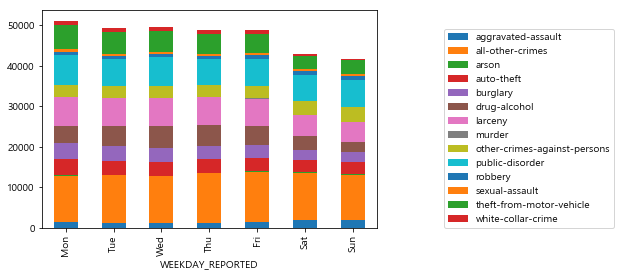

In [24]:
#주간 범죄 빈도를 barchart로 표현해줌
ax = weekday.plot.bar(stacked = True)
plt.legend(loc = (1.2, 0))
ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.show()

In [25]:
#주중시간대 데이터 추출
week_test = denver_crime[denver_crime.WEEKDAY_REPORTED < 5]
week_test.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,HOUR_REPORTED,WEEKDAY_REPORTED,MONTH_REPORTED,YEAR_REPORTED
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,2016-06-15 23:31:00,NaN,...,5,521,montbello,1,0,2016,23,2,6,2016
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,2018-01-29 17:53:00,NaN,...,5,522,gateway-green-valley-ranch,1,0,2018,17,0,1,2018
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,2016-04-26 21:02:00,2932 S JOSEPHINE ST,...,3,314,wellshire,1,0,2016,21,1,4,2016
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,2018-01-30 22:29:00,705 S COLORADO BLVD,...,3,312,belcaro,1,0,2018,22,1,1,2018
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,2017-06-23 16:09:00,2810 E 1ST AVE,...,3,311,cherry-creek,1,0,2017,16,4,6,2017


In [26]:
#주말 시간대 데이터 추출
weekend_test = denver_crime[denver_crime.WEEKDAY_REPORTED >= 5]
weekend_test.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,HOUR_REPORTED,WEEKDAY_REPORTED,MONTH_REPORTED,YEAR_REPORTED
14,2016236602,2016236602230300,2303,0,theft-shoplift,larceny,4/16/2016 3:25:00 PM,NaN,2016-04-16 16:06:00,950 S QUEBEC ST,...,3,321,windsor,1,0,2016,16,5,4,2016
15,20176004695,20176004695230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,5/28/2017 2:00:00 AM,5/28/2017 7:00:00 AM,2017-05-28 19:58:00,3400 BLK N WYANDOT ST,...,1,113,highland,1,0,2017,19,6,5,2017
16,2017395809,2017395809240400,2404,0,theft-of-motor-vehicle,auto-theft,6/16/2017 9:30:00 PM,6/17/2017 7:12:00 AM,2017-06-17 07:12:00,6825 E ILIFF AVE,...,3,323,goldsmith,1,0,2017,7,5,6,2017
28,2017294559,2017294559240400,2404,0,theft-of-motor-vehicle,auto-theft,5/6/2017 12:00:00 AM,5/6/2017 8:30:00 AM,2017-05-06 09:48:00,NaN,...,1,122,west-colfax,1,0,2017,9,5,5,2017
47,2017791814,2017791814131300,1313,0,assault-simple,other-crimes-against-persons,11/25/2017 6:30:00 PM,11/26/2017 6:00:00 AM,2017-11-26 12:30:00,1920 N HIGH ST,...,6,622,city-park-west,1,0,2017,12,6,11,2017


In [27]:
#주중 시간대 범죄 groupby시켜줌
week_grouped = week_test.groupby(week_test.REPORTED_DATE.dt.date)["REPORTED_DATE"].count()
print(week_grouped.mean())
week_grouped.head()#주중 시간대 범죄 빈도 평균 조사

190.50729086722947


REPORTED_DATE
2014-01-02     86
2014-01-03     99
2014-01-06    113
2014-01-07    122
2014-01-08    141
Name: REPORTED_DATE, dtype: int64

In [28]:
#주말 시간대 범죄 groupby시켜줌
weekend_grouped = weekend_test.groupby(weekend_test.REPORTED_DATE.dt.date)["REPORTED_DATE"].count()
print(weekend_grouped.mean())
weekend_grouped.head()#주말 시간대 범죄 빈도 평균 조사

162.15900383141764


REPORTED_DATE
2014-01-04     80
2014-01-05     74
2014-01-11    140
2014-01-12    135
2014-01-18    123
Name: REPORTED_DATE, dtype: int64

가설 검정

H_0 : 주말시간대에 범죄 발생률이 더 높다.(mean1 - mean2 <= 0)

H_1 : 주중시간대에 범죄 발생률이 더 높다.(mean1 - mean2 > 0)

t-test 실시 0.05에서 유의수준 검정

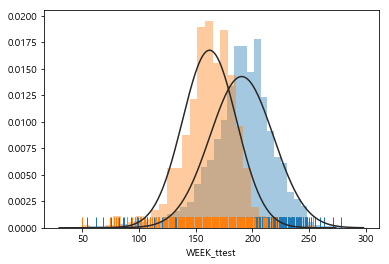

In [29]:
#마찬가지로 위의 분포가 t분포인지 여부를 seaborn으로 시각화
sns.distplot(week_grouped, kde = False, rug = True, fit = stats.norm)
sns.distplot(weekend_grouped, kde = False, rug = True, fit = stats.norm)
plt.xlabel("WEEK_ttest")
plt.show()

In [30]:
#stats모듈을 통해서 p-value를 구해봄
stats.ttest_ind(week_grouped, weekend_grouped, equal_var = False)#주중에 범죄가 더 많이 일어난다 볼수 있다.

Ttest_indResult(statistic=21.813499561566164, pvalue=3.5729860270671664e-88)

In [31]:
#시간대 별로 데이터 groupby시켜줌
time = denver_crime.groupby([denver_crime.HOUR_REPORTED, denver_crime.OFFENSE_CATEGORY_ID])["HOUR_REPORTED", "OFFENSE_CATEGORY_ID"].agg("count")
time.drop("HOUR_REPORTED", axis = 1, inplace = True)
time  = time.unstack(level = 1)
time.head()

OFFENSE_CATEGORY_ID                                    \
OFFENSE_CATEGORY_ID  aggravated-assault all-other-crimes arson auto-theft   
HOUR_REPORTED                                                               
0                                   553             5088    33        439   
1                                   586             4388    25        357   
2                                   584             3703    21        301   
3                                   476             3040    22        306   
4                                   394             2428    27        348   

                                                          \
OFFENSE_CATEGORY_ID burglary drug-alcohol larceny murder   
HOUR_REPORTED                                              
0                        442         1232     692     19   
1                        403         1067     502     18   
2                        450          868     415     16   
3                        496          724     362     16   
4                        458          617     308     12   

                                                                          \
OFFENSE_CATEGORY_ID other-crimes-against-persons public-disorder robbery   
HOUR_REPORTED                                                              
0                                           1078            1714     314   
1                                           1026            1700     307   
2                                           1004            1463     309   
3                                            761            1189     259   
4                                            589             843     180   

                                                                                
OFFENSE_CATEGORY_ID sexual-assault theft-from-motor-vehicle white-collar-crime  
HOUR_REPORTED                                                                   
0                              130                      368                 53  
1                              133                      280                 41  
2                               99                      236                 41  
3                              104                      217                 36  
4                              105                      207                 30

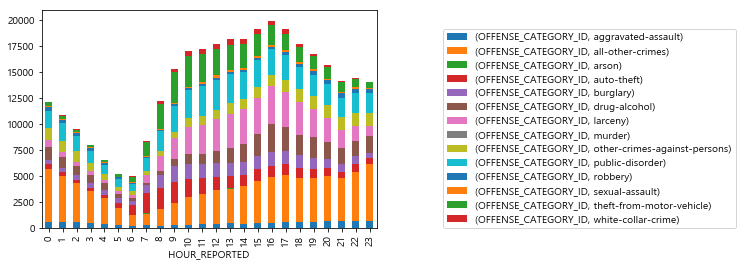

In [32]:
#시간대별로 범죄빈도 시각화
time.plot.bar(stacked = True)
plt.legend(loc = [1.2, 0])
plt.show()

No handles with labels found to put in legend.


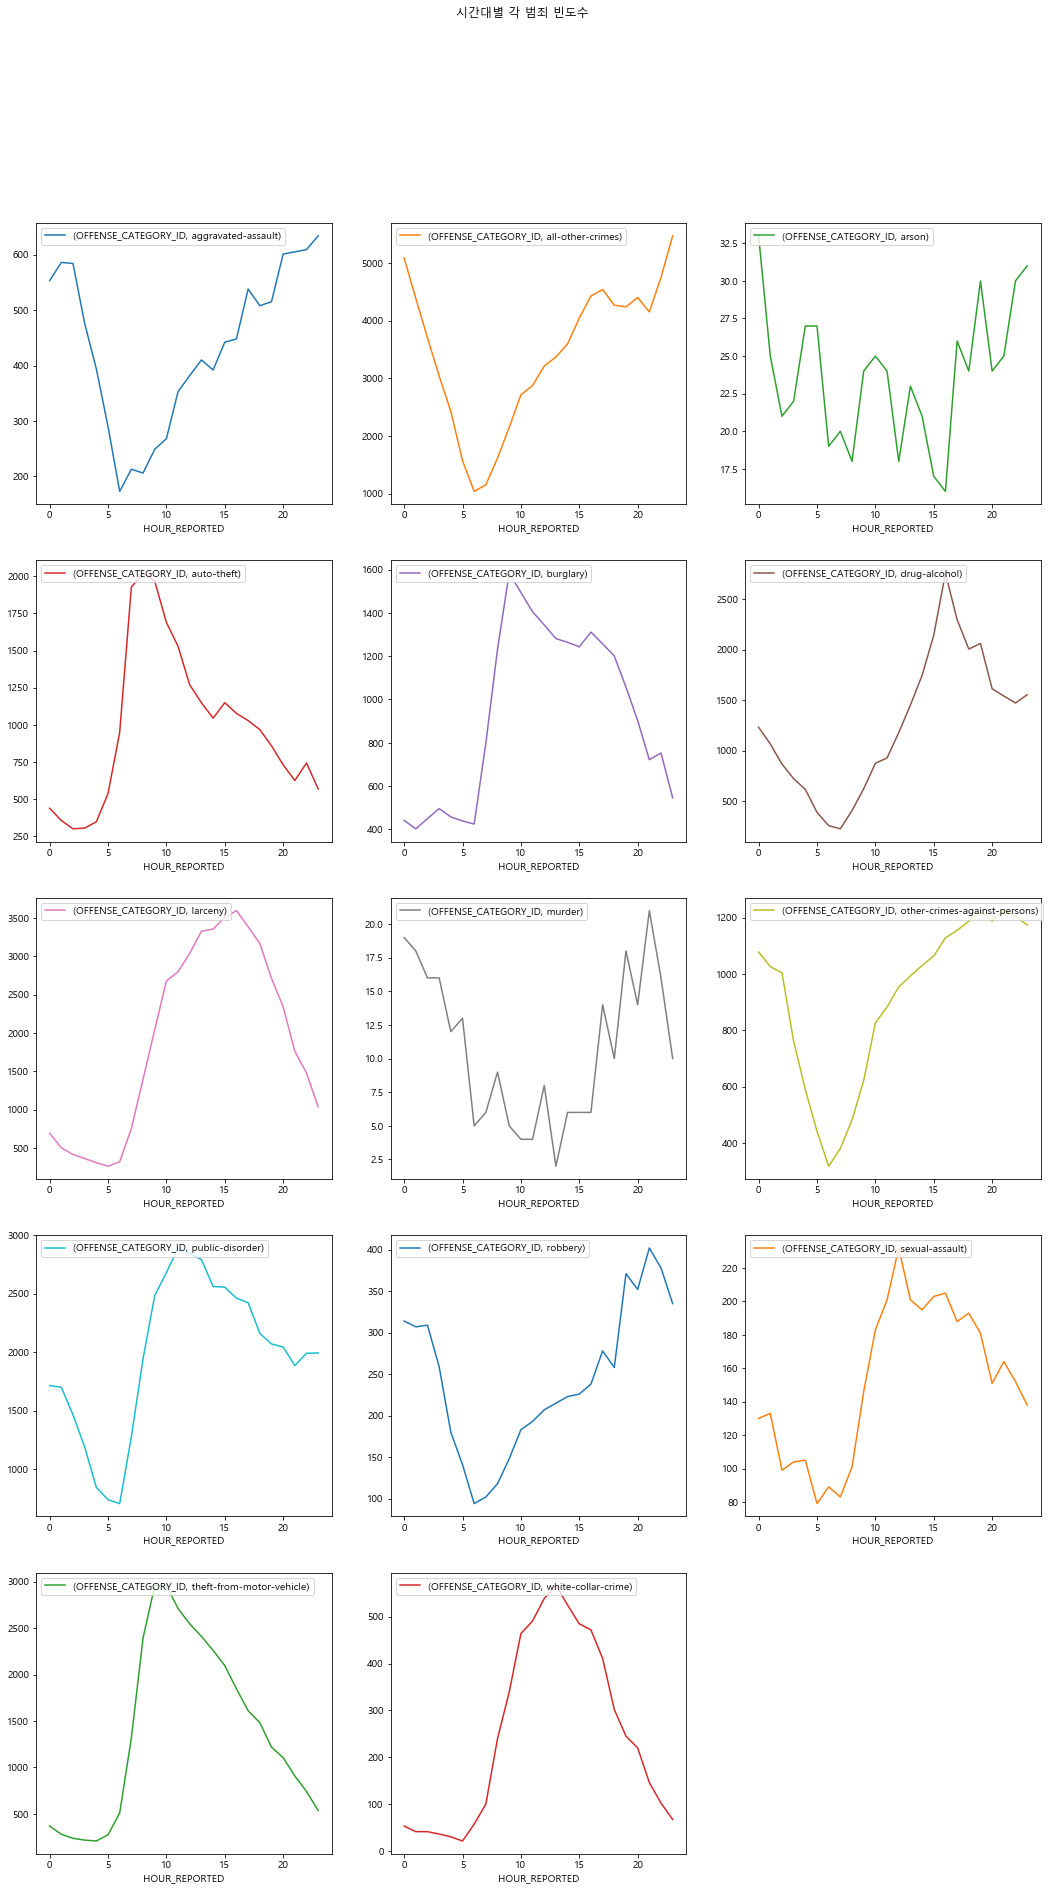

In [41]:
#시간대별로 무슨 범죄가 많이 일어나는지 시각화
fig = time.plot(kind='line', figsize=(18,30),subplots=True,layout=(-1,3),sharex=False,sharey=False)#각 시각화를 한꺼번에 보여주기 위해 설정
for row in fig:
    for item in row:
        item.legend(loc = "upper left")
plt.suptitle("시간대별 각 범죄 빈도수")
plt.show()

In [42]:
#denver에 있는 지역구 들을 나눠봄
np.sort(denver_crime.DISTRICT_ID.unique())

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

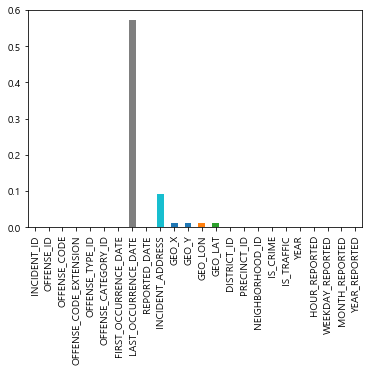

In [43]:
#데이터 결측치 파악
judge = denver_crime.isnull().sum() / len(denver_crime)
judge.plot.bar()
plt.show()

In [44]:
#덴버지역구를 나눠서 결측치를 제거함 아래도 동일
denver_1 = denver_crime[denver_crime.DISTRICT_ID == 1]
denver_1 = denver_1[~(denver_1.GEO_LAT.isnull() | denver_1.GEO_LON.isnull())]

denver_2 = denver_crime[denver_crime.DISTRICT_ID == 2]
denver_2 = denver_2[~(denver_2.GEO_LAT.isnull() | denver_2.GEO_LON.isnull())]

denver_3 = denver_crime[denver_crime.DISTRICT_ID == 3]
denver_3 = denver_3[~(denver_3.GEO_LAT.isnull() | denver_3.GEO_LON.isnull())]

denver_4 = denver_crime[denver_crime.DISTRICT_ID == 4]
denver_4 = denver_4[~(denver_4.GEO_LAT.isnull() | denver_4.GEO_LON.isnull())]

denver_5 = denver_crime[denver_crime.DISTRICT_ID == 5]
denver_5 = denver_5[~(denver_5.GEO_LAT.isnull() | denver_5.GEO_LON.isnull())]

denver_6 = denver_crime[denver_crime.DISTRICT_ID == 6]
denver_6 = denver_6[~(denver_6.GEO_LAT.isnull() | denver_6.GEO_LON.isnull())]

denver_7 = denver_crime[denver_crime.DISTRICT_ID == 7]
denver_7 = denver_7[~(denver_7.GEO_LAT.isnull() | denver_7.GEO_LON.isnull())]

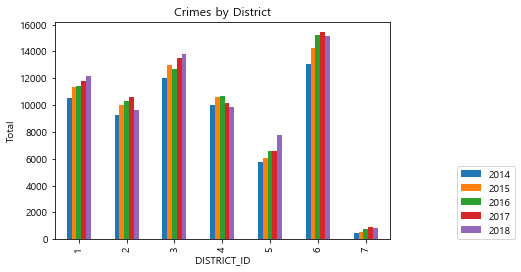

In [45]:
#각 지역구 마다 년도별로 범죄가 얼마나 많이 일어나는지 조사
temp = denver_crime.groupby([denver_crime.YEAR_REPORTED, denver_crime.DISTRICT_ID])["DISTRICT_ID"].agg("count")
temp = temp.unstack(level = 0)
temp.plot.bar()
plt.legend(loc = (1.2, 0))
plt.title("Crimes by District")
plt.ylabel("Total")
plt.show()

In [46]:
#덴버의 범죄 유형을 따로 뽑아주었다.
denver_crime.OFFENSE_CATEGORY_ID.unique()

array(['all-other-crimes', 'larceny', 'theft-from-motor-vehicle',
       'drug-alcohol', 'auto-theft', 'white-collar-crime', 'burglary',
       'public-disorder', 'aggravated-assault',
       'other-crimes-against-persons', 'robbery', 'sexual-assault',
       'murder', 'arson'], dtype=object)

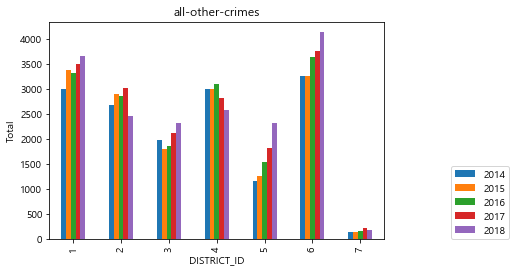

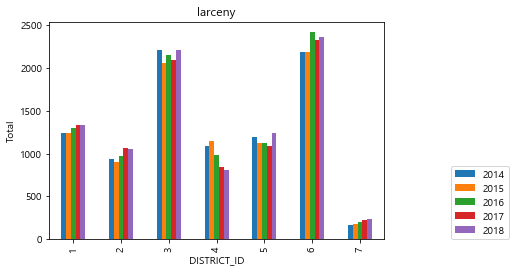

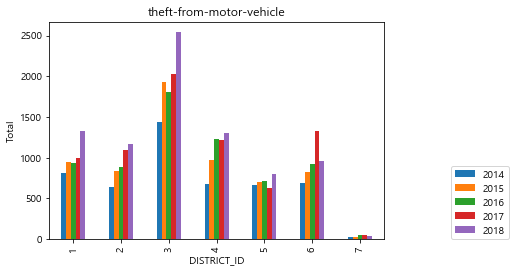

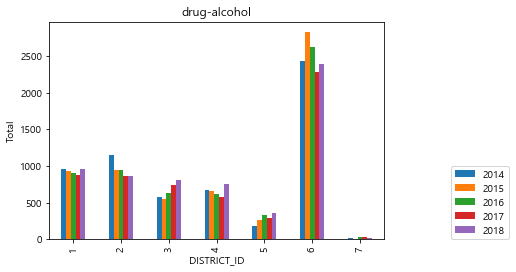

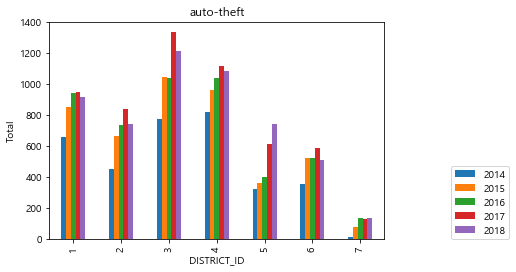

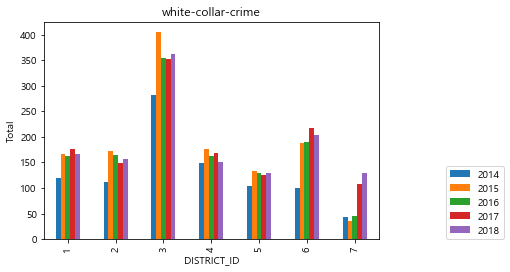

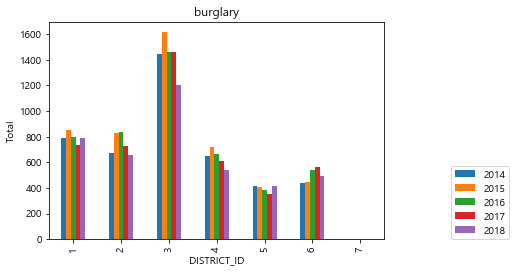

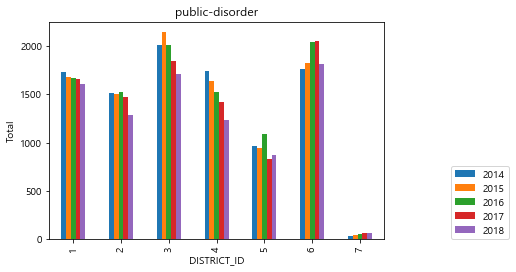

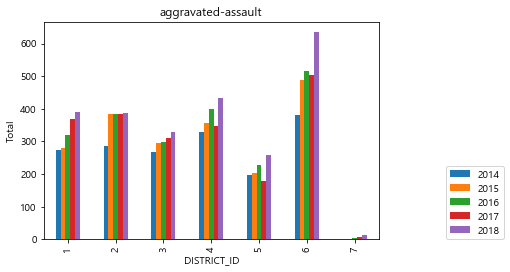

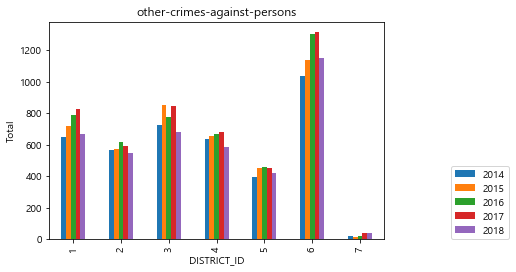

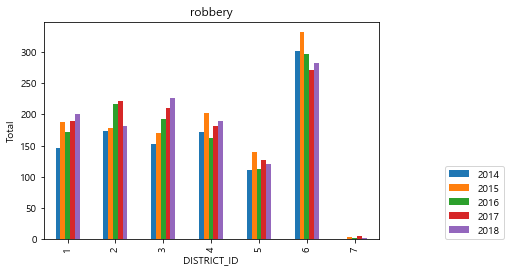

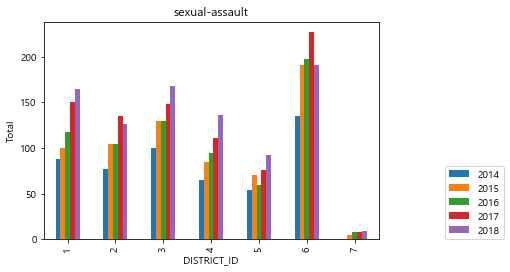

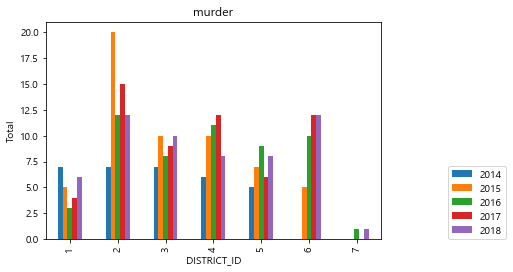

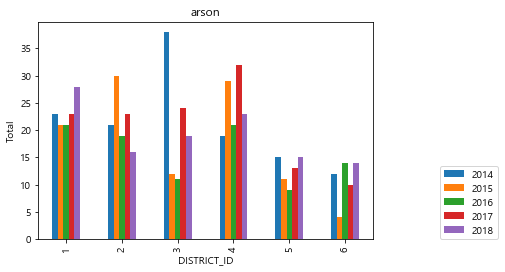

In [47]:
#각각의 범죄 유형을 시각화 시켜주기로 했다.
for offense in denver_crime.OFFENSE_CATEGORY_ID.unique():
    temp = denver_crime[denver_crime.OFFENSE_CATEGORY_ID == offense].groupby([denver_crime.YEAR_REPORTED, denver_crime.DISTRICT_ID])["DISTRICT_ID"].agg("count")
    temp = temp.unstack(level = 0)
    temp.plot.bar()
    plt.legend(loc = (1.2, 0))
    plt.title(offense)
    plt.ylabel("Total")
    plt.show()

In [48]:
#지도 시각화 모듈을 사용해서 범죄 빈도를 한눈에 시각화해보기로 했다.
import folium
from folium import plugins

In [49]:
#데이터 결측치 제거를 위해서 상태를 나타내줌
condition = denver_crime.GEO_LAT.isnull() | denver_crime.GEO_LON.isnull()

In [54]:
#데이터 결측치 삭제 후 약물범죄 데이터의 지도 시각화 실시를 위해서 데이터를 따로 뽑아줌
lat_lon = denver_crime[~condition]
drug_alcohol = lat_lon[(lat_lon.OFFENSE_CATEGORY_ID == "drug-alcohol")]
drug_alcohol.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,HOUR_REPORTED,WEEKDAY_REPORTED,MONTH_REPORTED,YEAR_REPORTED
10,201872390,201872390357200,3572,0,drug-methampetamine-possess,drug-alcohol,1/30/2018 8:04:00 PM,NaN,2018-01-30 22:12:00,E EVANS AVE / S GRAPE ST,...,3,323,goldsmith,1,0,2018,22,1,1,2018
34,201872177,201872177410400,4104,0,liquor-possession,drug-alcohol,1/30/2018 6:19:00 PM,NaN,2018-01-30 19:44:00,800 N DELAWARE ST,...,1,123,lincoln-park,1,0,2018,19,1,1,2018
60,2017793822,2017793822357200,3572,0,drug-methampetamine-possess,drug-alcohol,10/13/2017 5:00:00 PM,NaN,2017-11-27 09:54:00,2000 W COLFAX AVE,...,1,122,lincoln-park,1,0,2017,9,0,11,2017
76,201872610,201872610354200,3542,0,drug-synth-narcotic-possess,drug-alcohol,1/30/2018 10:46:00 PM,NaN,2018-01-30 23:53:00,E 40TH AVE / N COLORADO BLVD,...,2,212,northeast-park-hill,1,0,2018,23,1,1,2018
99,201872849,201872849351200,3512,0,drug-heroin-possess,drug-alcohol,1/31/2018 12:51:00 AM,NaN,2018-01-31 01:53:00,N YOSEMITE ST / E COLFAX AVE,...,2,223,east-colfax,1,0,2018,1,2,1,2018


In [51]:
#위치 경도값을 함수에 제대로 넣어주기 위해서 각 위도 경도 값을 행렬화시킴
drug_alcohol_location = np.array(drug_alcohol[["GEO_LAT", "GEO_LON"]])
drug_alcohol_location

array([[  39.6784635, -104.9251973],
       [  39.7290958, -104.9927726],
       [  39.7394073, -105.0162988],
       ...,
       [  39.7419817, -104.8881735],
       [  39.7340038, -104.9726583],
       [  39.7133877, -105.0250839]])

In [52]:
#약물 범죄에 따른 지도 시각화
m = folium.Map(location=[39.73,-104.90],zoom_start=11, control_scale=True)
m.add_child(plugins.HeatMap(drug_alcohol_location,radius=15))
display(m)

In [55]:
#덴버 6구역에 약물범죄가 많아 관심이 생겨서 범죄 빈도 지도 시각화를 위해 위와 같은 논리로 코드 작성
drug_six = drug_alcohol[drug_alcohol.DISTRICT_ID == 6]
drug_six.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,HOUR_REPORTED,WEEKDAY_REPORTED,MONTH_REPORTED,YEAR_REPORTED
107,201872352,201872352355000,3550,0,drug-poss-paraphernalia,drug-alcohol,1/30/2018 7:44:00 PM,NaN,2018-01-30 20:19:00,1500 BLOCK N PEARL ST / N PENNSYLVANIA ST,...,6,621,north-capitol-hill,1,0,2018,20,1,1,2018
176,201875085,201875085355000,3550,0,drug-poss-paraphernalia,drug-alcohol,1/31/2018 8:00:00 PM,NaN,2018-01-31 20:38:00,1100 BLOCK 22ND ST,...,6,611,five-points,1,0,2018,20,2,1,2018
193,201874915,201874915351000,3510,0,drug-heroin-sell,drug-alcohol,1/31/2018 4:13:00 PM,NaN,2018-01-31 16:13:00,1400 BLK N BROADWAY ST,...,6,623,capitol-hill,1,0,2018,16,2,1,2018
330,201874673,201874673351200,3512,0,drug-heroin-possess,drug-alcohol,1/31/2018 4:00:00 PM,NaN,2018-01-31 21:55:00,757 E 20TH AVE,...,6,621,five-points,1,0,2018,21,2,1,2018
382,201874701,201874701351000,3510,0,drug-heroin-sell,drug-alcohol,1/31/2018 4:00:00 PM,NaN,2018-01-31 19:51:00,1400 BLOCK N BROADWAY ST,...,6,623,capitol-hill,1,0,2018,19,2,1,2018


In [56]:
drug_six_location = np.array(drug_six[["GEO_LAT", "GEO_LON"]])

In [57]:
drug_six_location

array([[  39.7408439, -104.9798149],
       [  39.7535962, -104.988708 ],
       [  39.7392544, -104.9873155],
       ...,
       [  39.7398975, -104.987485 ],
       [  39.7400317, -104.9730966],
       [  39.7340038, -104.9726583]])

In [58]:
#덴버 6구역의 지도 시각화
m = folium.Map(location=[39.73,-104.90],zoom_start=11, control_scale=True)
m.add_child(plugins.HeatMap(drug_six_location,radius=15))
display(m)